# Workshop 1: Mobile Price Range Classification

In this workshop we will learn how to train a neural network with numeric data as input to predict the price range of mobile phones ([info of the data](https://www.kaggle.com/iabhishekofficial/mobile-price-classification/data#)). The main blocks of the workshop are:

1. Get the data from Google Drive.
2. Load and Pre-process the data.
3. Define a Fully Connected Neural Network.
4. Choose loss function and optimizer.
5. Train the network.

The main libraries thar will be used in the workshop are:

- Tensorflow
- Keras
- Sci-kit Learn
- Matplotlib
- Numpy
- Pandas

[Reference](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)

## 1. Get the data from Google Drive

In [1]:
# Import libraries to interact with Google Drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [2]:
# Authenticate with your Google account to get access to the data
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
# Download data
download = drive.CreateFile({'id': '1igTyUp-YTHG0ig9VeNu83R8jBWn5Djji'})
download.GetContentFile('mobile_price.zip')

In [4]:
# Extract data from zip file
import zipfile
from pathlib import Path
data_path = Path("./mobile_price.zip")

with zipfile.ZipFile(str(data_path), 'r') as zip_ref:
    zip_ref.extractall("./data")

In [5]:
# List files of ./data directory
!ls ./data

test.csv  train.csv


## 2. Load and Pre-process the data



In [6]:
# Load dependencies for loading data
import numpy as np
import pandas as pd

In [7]:
# Load training dataset and check variables
dataset = pd.read_csv('./data/train.csv')

In [8]:
# Show variables
dataset.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [9]:
# Show first 5 rows
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [10]:
# Import dependencies for pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [11]:
# Convert pandas Dataframe to Numpy Array
dataset_numpy = dataset.values

In [12]:
# Show data type before and after conversion
print(type(dataset))
print(type(dataset_numpy.dtype))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.dtype[float64]'>


In [13]:
# Separate input variables from output label
X = dataset_numpy[:, :20]
y = dataset_numpy[:, 20:21]

In [14]:
# Show shape of training data and labels
print("Shape of training data: ", X.shape)
print("Shape of training labels: ", y.shape)

Shape of training data:  (2000, 20)
Shape of training labels:  (2000, 1)


In [15]:
# Show different classes to predict
np.unique(y)

array([0., 1., 2., 3.])

In [16]:
# Normalizing the data to improve stability while training
sc = StandardScaler()
sc.fit(X)
X_norm = sc.transform(X)

In [17]:
# Show mean and Standard Deviation learnt from training data
print("Mean per variable: \n", sc.mean_)
print("Standard Deviation per variable: \n", sc.scale_)

Mean per variable: 
 [1.2385185e+03 4.9500000e-01 1.5222500e+00 5.0950000e-01 4.3095000e+00
 5.2150000e-01 3.2046500e+01 5.0175000e-01 1.4024900e+02 4.5205000e+00
 9.9165000e+00 6.4510800e+02 1.2515155e+03 2.1242130e+03 1.2306500e+01
 5.7670000e+00 1.1011000e+01 7.6150000e-01 5.0300000e-01 5.0700000e-01]
Standard Deviation per variable: 
 [4.39308338e+02 4.99974999e-01 8.15800182e-01 4.99909742e-01
 4.34035825e+00 4.99537536e-01 1.81411780e+01 2.88343437e-01
 3.53908039e+01 2.28726469e+00 6.06279867e+00 4.43669852e+02
 4.32091384e+02 1.08446083e+03 4.21219156e+00 4.35530837e+00
 5.46258904e+00 4.26166341e-01 4.99991000e-01 4.99950998e-01]


In [18]:
# Show data before and after normalization
print("Before normalization: \n", X[1, :])
print("After normalization: \n", X_norm[1, :])

Before normalization: 
 [1.021e+03 1.000e+00 5.000e-01 1.000e+00 0.000e+00 1.000e+00 5.300e+01
 7.000e-01 1.360e+02 3.000e+00 6.000e+00 9.050e+02 1.988e+03 2.631e+03
 1.700e+01 3.000e+00 7.000e+00 1.000e+00 1.000e+00 0.000e+00]
After normalization: 
 [-0.49513857  1.0100505  -1.2530642   0.98117712 -0.99289039  0.95788598
  1.15502422  0.68754816 -0.12005944 -0.66476784 -0.64598879  0.58577791
  1.70446468  0.46731702  1.11426556 -0.63531667 -0.73426721  0.55964063
  0.99401789 -1.01409939]


In [19]:
# One-hot encoding of labels
onehot_enc = OneHotEncoder()
y_onehot = onehot_enc.fit_transform(y).toarray()

In [20]:
# Show labels before and after one-hot encoding
print("Before onet-hot encodeing: \n", y[0])
print("After onet-hot encodeing: \n", y_onehot[0])

Before onet-hot encodeing: 
 [1.]
After onet-hot encodeing: 
 [0. 1. 0. 0.]


In [21]:
# Split data in training and validation partitions
X_train, X_val, y_train, y_val = train_test_split(X_norm, y_onehot, 
                                                  test_size=0.1)

In [22]:
# Show sizes of partitions
print("Size of training data: ", X_train.shape)
print("Size of training labels: ", y_train.shape)
print("Size of validation data: ", X_val.shape)
print("Size of validation labels: ", y_val.shape)

Size of training data:  (1800, 20)
Size of training labels:  (1800, 4)
Size of validation data:  (200, 20)
Size of validation labels:  (200, 4)


## 3. Define a Fully Connected Neural Network

In [23]:
# Import dependencies for designing Keras model
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [24]:
# Design simple neural network architecture
model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [25]:
# Show model information
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                336       
                                                                 
 dense_1 (Dense)             (None, 12)                204       
                                                                 
 dense_2 (Dense)             (None, 4)                 52        
                                                                 
Total params: 592
Trainable params: 592
Non-trainable params: 0
_________________________________________________________________


The number of parameters of each layer is obtained as follows:


*   params_dense_1 = (input_var_num + 1) * dense_1_neurons = (20 + 1) * 16 = 336
*   params_dense_2 = (dense_1_neurons + 1) * dense_2_neurons = (16 + 1) * 12 =      204
*   params_dense_3 = (dense_2_neurons + 1) * dense_3_neurons = (12 + 1) * 4 =      52

Where +1 comes from the bias term added in each layer.




## 4. Choose loss function and optimizer


In [26]:
# Choose loss function, optimizer and training metrics
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

## 5. Train the network



In [27]:
# Choose number of epochs and batch size and train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, 
                    validation_data=(X_val, y_val))

Epoch 1/100
29/29 [==============================] - 6s 11ms/step - loss: 1.5070 - accuracy: 0.2217 - val_loss: 1.4184 - val_accuracy: 0.2200
Epoch 2/100
29/29 [==============================] - 0s 5ms/step - loss: 1.3903 - accuracy: 0.2683 - val_loss: 1.3509 - val_accuracy: 0.2950
Epoch 3/100
29/29 [==============================] - 0s 7ms/step - loss: 1.3231 - accuracy: 0.3367 - val_loss: 1.2960 - val_accuracy: 0.3750
Epoch 4/100
29/29 [==============================] - 0s 7ms/step - loss: 1.2664 - accuracy: 0.3956 - val_loss: 1.2421 - val_accuracy: 0.4050
Epoch 5/100
29/29 [==============================] - 0s 7ms/step - loss: 1.2090 - accuracy: 0.4472 - val_loss: 1.1831 - val_accuracy: 0.4350
Epoch 6/100
29/29 [==============================] - 0s 6ms/step - loss: 1.1443 - accuracy: 0.4872 - val_loss: 1.1156 - val_accuracy: 0.4850
Epoch 7/100
29/29 [==============================] - 0s 7ms/step - loss: 1.0707 - accuracy: 0.5272 - val_loss: 1.0371 - val_accuracy: 0.5350
Epoch 8/100


In [28]:
# Import dependence for plotting training process 
import matplotlib.pyplot as plt

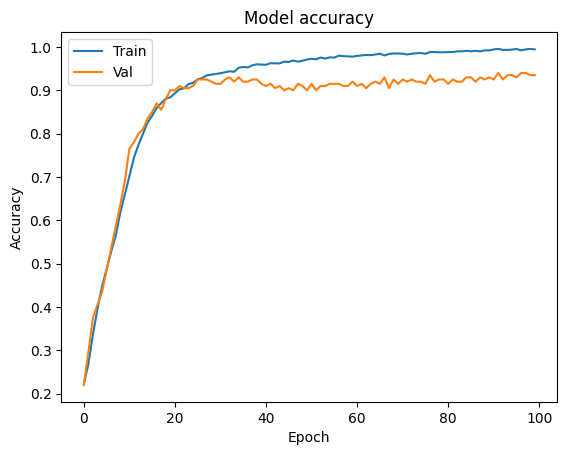

In [29]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

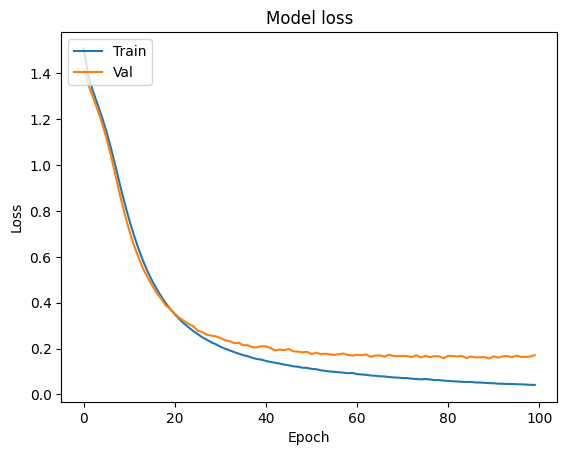

In [30]:
# Plot training and test loss
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss')
plt.xlabel('Epoch') 
plt.legend(['Train', 'Val'], loc='upper left') 
plt.show()

In [31]:
# Save the model
from pathlib import Path
path = Path('./models')
if not path.exists():
  path.mkdir()
model.save('./models/model_1.h5')

In [32]:
# List files of ./models directory
!ls ./models

model_1.h5


# Exercise 1: Train the model without normalization

In [33]:
# Split data without normalization in training and validation partitions
X_train, X_val, y_train, y_val = train_test_split(X, y_onehot, 
                                                  test_size=0.1)

In [34]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, 
                    validation_data=(X_val, y_val))

Epoch 1/100
29/29 [==============================] - 0s 9ms/step - loss: 12151.0322 - accuracy: 0.2428 - val_loss: 6008.4995 - val_accuracy: 0.2200
Epoch 2/100
29/29 [==============================] - 0s 7ms/step - loss: 3866.4077 - accuracy: 0.2556 - val_loss: 2579.1233 - val_accuracy: 0.2450
Epoch 3/100
29/29 [==============================] - 0s 7ms/step - loss: 1696.5635 - accuracy: 0.3222 - val_loss: 1045.0228 - val_accuracy: 0.4400
Epoch 4/100
29/29 [==============================] - 0s 8ms/step - loss: 651.0328 - accuracy: 0.4606 - val_loss: 376.0873 - val_accuracy: 0.5600
Epoch 5/100
29/29 [==============================] - 0s 6ms/step - loss: 309.9373 - accuracy: 0.5128 - val_loss: 244.5195 - val_accuracy: 0.5750
Epoch 6/100
29/29 [==============================] - 0s 4ms/step - loss: 225.3150 - accuracy: 0.5000 - val_loss: 185.8466 - val_accuracy: 0.5000
Epoch 7/100
29/29 [==============================] - 0s 4ms/step - loss: 179.4079 - accuracy: 0.5022 - val_loss: 155.8232 -

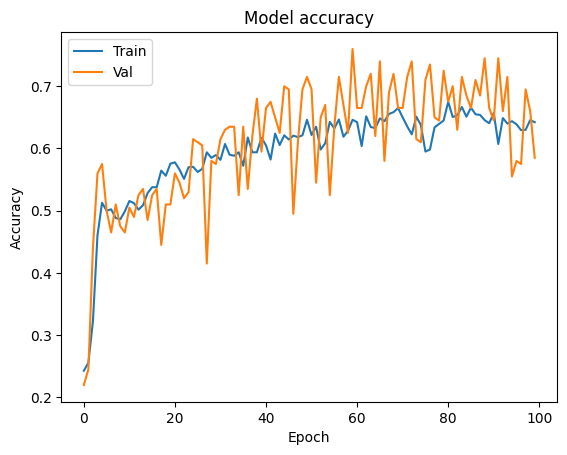

In [35]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

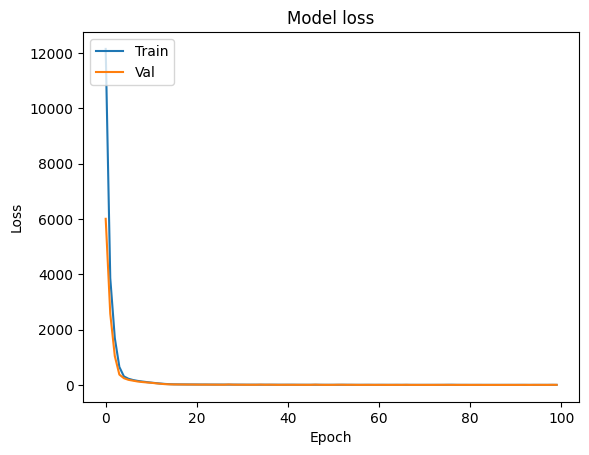

In [36]:
# Plot training and test loss
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss')
plt.xlabel('Epoch') 
plt.legend(['Train', 'Val'], loc='upper left') 
plt.show()

# Exercise 2: Train a simpler model and evaluate the results

In [37]:
# Split data with normalization in training and validation partitions
X_train, X_val, y_train, y_val = train_test_split(X_norm, y_onehot, 
                                                  test_size=0.1)


In [38]:
# Design a model like the previous but without the second Dense layer
model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [39]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [40]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, 
                    validation_data=(X_val, y_val))

Epoch 1/100
29/29 [==============================] - 1s 9ms/step - loss: 1.6909 - accuracy: 0.2767 - val_loss: 1.6580 - val_accuracy: 0.2800
Epoch 2/100
29/29 [==============================] - 0s 4ms/step - loss: 1.5509 - accuracy: 0.2828 - val_loss: 1.5196 - val_accuracy: 0.2900
Epoch 3/100
29/29 [==============================] - 0s 4ms/step - loss: 1.4559 - accuracy: 0.3044 - val_loss: 1.4247 - val_accuracy: 0.3450
Epoch 4/100
29/29 [==============================] - 0s 4ms/step - loss: 1.3875 - accuracy: 0.3272 - val_loss: 1.3515 - val_accuracy: 0.4000
Epoch 5/100
29/29 [==============================] - 0s 4ms/step - loss: 1.3308 - accuracy: 0.3611 - val_loss: 1.2893 - val_accuracy: 0.4200
Epoch 6/100
29/29 [==============================] - 0s 4ms/step - loss: 1.2811 - accuracy: 0.3967 - val_loss: 1.2361 - val_accuracy: 0.4750
Epoch 7/100
29/29 [==============================] - 0s 5ms/step - loss: 1.2349 - accuracy: 0.4222 - val_loss: 1.1878 - val_accuracy: 0.4950
Epoch 8/100
2

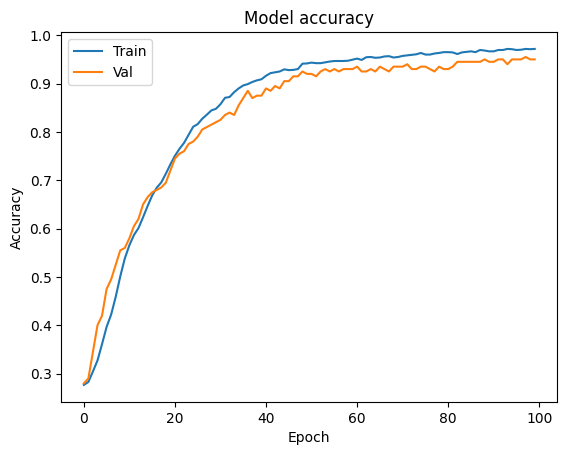

In [41]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

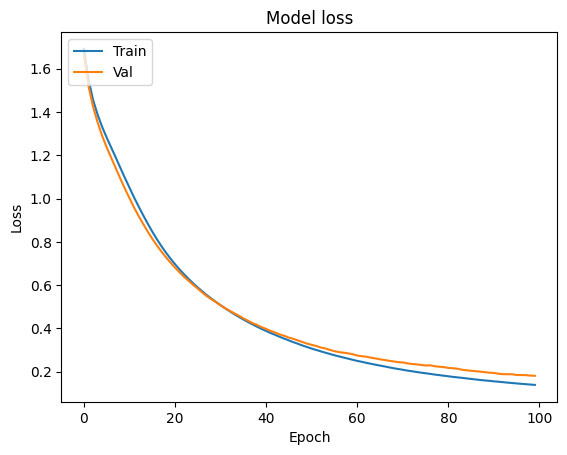

In [42]:
# Plot training and test loss
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss')
plt.xlabel('Epoch') 
plt.legend(['Train', 'Val'], loc='upper left') 
plt.show()

# Exercise 3: Train a more complex model and evaluate the results

In [43]:
# Split data with normalization in training and validation partitions
X_train, X_val, y_train, y_val = train_test_split(X_norm, y_onehot, 
                                                  test_size=0.1)


In [44]:
# Design a model like the previous but with 128 neurons in the first Dense layer
# and 256 in the second
model = Sequential()
model.add(Dense(128, input_dim=20, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))


In [45]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [46]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, 
                    validation_data=(X_val, y_val))

Epoch 1/100
29/29 [==============================] - 2s 10ms/step - loss: 1.1530 - accuracy: 0.4994 - val_loss: 0.8838 - val_accuracy: 0.6600
Epoch 2/100
29/29 [==============================] - 0s 5ms/step - loss: 0.7059 - accuracy: 0.7444 - val_loss: 0.5989 - val_accuracy: 0.7250
Epoch 3/100
29/29 [==============================] - 0s 4ms/step - loss: 0.4567 - accuracy: 0.8633 - val_loss: 0.4254 - val_accuracy: 0.8600
Epoch 4/100
29/29 [==============================] - 0s 5ms/step - loss: 0.3174 - accuracy: 0.9233 - val_loss: 0.3383 - val_accuracy: 0.8750
Epoch 5/100
29/29 [==============================] - 0s 5ms/step - loss: 0.2417 - accuracy: 0.9400 - val_loss: 0.2940 - val_accuracy: 0.9050
Epoch 6/100
29/29 [==============================] - 0s 5ms/step - loss: 0.1869 - accuracy: 0.9572 - val_loss: 0.2435 - val_accuracy: 0.9100
Epoch 7/100
29/29 [==============================] - 0s 5ms/step - loss: 0.1492 - accuracy: 0.9717 - val_loss: 0.2265 - val_accuracy: 0.9150
Epoch 8/100


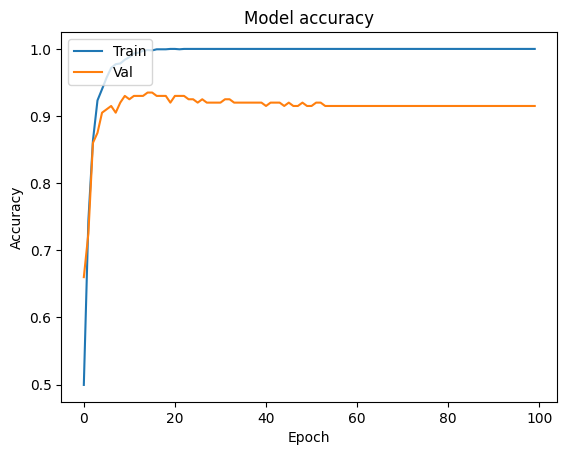

In [47]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

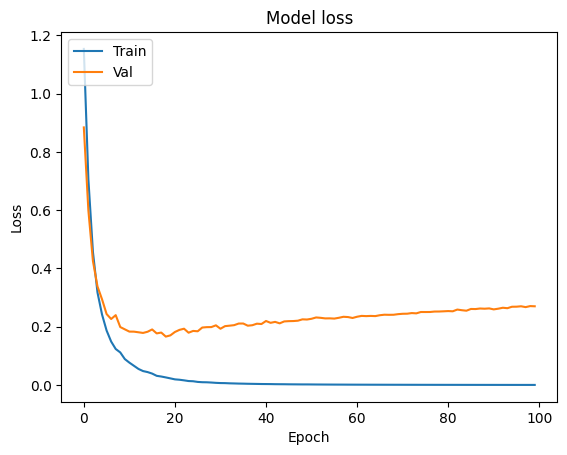

In [48]:
# Plot training and test loss
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss')
plt.xlabel('Epoch') 
plt.legend(['Train', 'Val'], loc='upper left') 
plt.show()

# Exercise 4: Predict the price range of the phones of the test.csv file

In [49]:
# Read it test data from csv
dataset_test = pd.read_csv('./data/test.csv')

In [50]:
# Show column names (pay attention, maybe there is something different)
dataset_test.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [63]:
# Compare it to the train dataset: test dataset has 1 more column: 'id'
dataset.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [75]:
# Convert the data to numpy array
dataset_numpy = dataset_test.values
X_test = dataset_numpy[:, 1:21]


In [76]:
# Show shape of the data
print("Shape of training data: ", X_test.shape)


Shape of training data:  (1000, 20)


In [ ]:
# Get rid of a column if needed
## ya lo he hecho

In [77]:
# Normalize data. Important!! Always normalize test data with the mean and
# standard deviation learnt from the training data.
X_test_norm = sc.transform(X_test)

In [78]:
# Show data before and after normalization
print("Before normalization: \n", X_test[1, :])
print("After normalization: \n", X_test_norm[1, :])

Before normalization: 
 [8.410e+02 1.000e+00 5.000e-01 1.000e+00 4.000e+00 1.000e+00 6.100e+01
 8.000e-01 1.910e+02 5.000e+00 1.200e+01 7.460e+02 8.570e+02 3.895e+03
 6.000e+00 0.000e+00 7.000e+00 1.000e+00 0.000e+00 0.000e+00]
After normalization: 
 [-0.90487356  1.0100505  -1.2530642   0.98117712 -0.07130748  0.95788598
  1.59600992  1.03435682  1.43401659  0.20963905  0.34365317  0.22740333
 -0.91303718  1.63287318 -1.49720161 -1.32413127 -0.73426721  0.55964063
 -1.00601811 -1.01409939]


In [79]:
# Load model saved during the example
from keras.models import load_model
model = load_model('./models/model_1.h5')

In [80]:
# Predict price range
predictions = model.predict(X_test_norm)

32/32 [==============================] - 1s 4ms/step


In [81]:
# Show predictions
predictions

array([[4.7588615e-20, 2.3998625e-09, 5.4001911e-03, 9.9459982e-01],
       [1.4982307e-23, 2.7256850e-11, 1.2849591e-03, 9.9871504e-01],
       [3.8877084e-16, 5.8886462e-06, 7.6367760e-01, 2.3631650e-01],
       ...,
       [8.9263380e-01, 1.0736626e-01, 1.0387864e-12, 5.3819404e-21],
       [3.6011496e-11, 1.4021056e-02, 9.8597449e-01, 4.4185731e-06],
       [2.0370038e-12, 8.2107412e-04, 9.9911851e-01, 6.0352977e-05]],
      dtype=float32)

In [84]:
# Convert predictions to scalars from one-hot encoding
scalar_predictions = np.argmax(predictions, axis=1)

In [88]:
# Show all scalar predictions
scalar_predictions

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 2, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 2, 0, 1, 0, 1,
       2, 2, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 1, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 0, 2, 1, 3, 1, 0, 0, 3, 0, 2, 1, 1, 2, 3,
       3, 2, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 2, 1, 0, 2,
       2, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 2, 2, 3, 3, 2, 2, 3, 2, 3, 1, 0,
       2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       2, 3, 1, 1, 3, 3, 3, 2, 2, 1, 0, 0, 1, 2, 0, 3, 3, 3, 0, 2, 0, 3,
       2, 2, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 0, 2, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 2, 1, 1, 3, 2, 1, 3, 0, 0, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

In [92]:
# Show the first test sample in Dataframe format

# Get the first test sample from the normalized features array
first_sample_norm = X_test_norm[0]

# Convert the normalized sample back to its original values
first_sample = pd.Series(first_sample_norm, index=dataset.columns[:-1])

# Add the target label back to the Series
first_sample['price_range'] = dataset.iloc[0]['price_range']

# Display the sample as a DataFrame
print(pd.DataFrame(first_sample).T)

   battery_power      blue  clock_speed  dual_sim       fc    four_g  \
0       -0.44506  1.010051     0.340463  0.981177  2.23265 -1.043966   

   int_memory     m_dep  mobile_wt   n_cores  ...  px_height  px_width  \
0    -1.49089 -1.393304   1.490528 -0.664768  ...  -0.944639  0.371413   

        ram      sc_h      sc_w  talk_time   three_g  touch_screen      wifi  \
0  1.246506 -0.072765  0.283103  -1.649584 -1.786861      0.994018 -1.014099   

   price_range  
0          1.0  

[1 rows x 21 columns]


In [93]:
# Show prediction for that sample
# Add the prediction to the Series
first_sample['preditions'] = scalar_predictions[0]

# Display the sample as a DataFrame
print(pd.DataFrame(first_sample).T)

   battery_power      blue  clock_speed  dual_sim       fc    four_g  \
0       -0.44506  1.010051     0.340463  0.981177  2.23265 -1.043966   

   int_memory     m_dep  mobile_wt   n_cores  ...  px_width       ram  \
0    -1.49089 -1.393304   1.490528 -0.664768  ...  0.371413  1.246506   

       sc_h      sc_w  talk_time   three_g  touch_screen      wifi  \
0 -0.072765  0.283103  -1.649584 -1.786861      0.994018 -1.014099   

   price_range  preditions  
0          1.0         3.0  

[1 rows x 22 columns]
